# Proyecto

## Objetivos del proyecto
Predecir la cantidad de crímenes por categorías según el conjunto de datos.

In [ ]:
# Importar librerías.
import pandas as pd
import os
from IPython.display import display as ds
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

## Análisis exploratorio de datos y selección de parámetros

In [ ]:
# Cargar el df_final ya procesado en la parte de limpieza de datos
df_final = pd.read_csv('/work/df_final.csv')

#df_final.info()
df_final

,id-mapa,anio,mes,dia,fecha,franja,tipo,subtipo,uso_arma,uso_moto,barrio,comuna,latitud,longitud,cantidad,cod_mes,cod_anio,cod_dia,dia_ordinal
0,500003,2018,AGOSTO,DOMINGO,2018-08-05,16.0,Robo,Robo total,NO,NO,RETIRO,1.0,-34.580776,-58.387188,1,8,2018,5,7
1,500006,2018,AGOSTO,LUNES,2018-08-06,17.0,Robo,Robo total,NO,NO,RETIRO,1.0,-34.580776,-58.387188,1,8,2018,6,1
2,500009,2018,AGOSTO,MIERCOLES,2018-08-08,22.0,Robo,Robo total,NO,NO,RETIRO,1.0,-34.580776,-58.387188,1,8,2018,8,3
3,500012,2018,AGOSTO,MIERCOLES,2018-08-08,15.0,Robo,Robo total,NO,NO,RETIRO,1.0,-34.595628,-58.386597,1,8,2018,8,3
4,500015,2018,AGOSTO,VIERNES,2018-08-10,12.0,Robo,Robo total,SI,NO,RETIRO,1.0,-34.581095,-58.385790,1,8,2018,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616390,1114494,2022,DICIEMBRE,JUEVES,2022-12-15,19.0,Vialidad,Muertes por siniestros viales,NO,NO,CHACARITA,15.0,-34.585065,-58.459021,1,12,2022,15,4
616391,1114495,2022,DICIEMBRE,VIERNES,2022-12-16,13.0,Vialidad,Muertes por siniestros viales,NO,NO,VELEZ SARSFIELD,10.0,-34.635240,-58.487609,1,12,2022,16,5
616392,1114496,2022,DICIEMBRE,JUEVES,2022-12-22,11.0,Vialidad,Muertes por siniestros viales,NO,NO,VELEZ SARSFIELD,10.0,-34.638974,-58.482881,1,12,2022,22,4
616393,1114497,2022,DICIEMBRE,VIERNES,2022-12-30,18.0,Vialidad,Muertes por siniestros viales,NO,NO,PARQUE AVELLANEDA,9.0,-34.652681,-58.481979,1,12,2022,30,5


### Columnas numéricas.

In [ ]:
columns_numerical = df_final.select_dtypes(include=['float','int'],).columns
ds(columns_numerical)
print("Número de columnas numéricas: ", len(columns_numerical))

Index(['id-mapa', 'anio', 'franja', 'comuna', 'latitud', 'longitud',
       'cantidad', 'cod_mes', 'cod_anio', 'cod_dia', 'dia_ordinal'],
      dtype='object')

Número de columnas numéricas:  11


### Columnas categóricas.

In [ ]:
columns_categorical = df_final.select_dtypes(include=['object']).columns
ds(columns_categorical)
print("Número de columnas categóricas: ", len(columns_categorical))

Index(['mes', 'dia', 'fecha', 'tipo', 'subtipo', 'uso_arma', 'uso_moto',
       'barrio'],
      dtype='object')

Número de columnas categóricas:  8


### Distribución gráfica de variables numéricas.

In [ ]:
# Gráficos de distribución para cada variable cuantitativa kde/histograma
# ==============================================================================
def graficosCuantitativos(columns_data):
  fig, axes = plt.subplots(nrows=4
                           ,ncols=3, figsize=(9,5))
  axes = axes.flat

  for i, column in enumerate(columns_data):
    sns.histplot(
        data= df_final,
        x=column,
        stat= 'count',
        kde =True,
        color = (list(plt.rcParams['axes.prop_cycle'])*2)[i]['color'], # administrar colores
        line_kws = {'linewidth': 2}, # espesor de linea
        alpha    = 0.3, # transparencia
        ax = axes[i]
    )
    axes[i].set_title(column, fontweight = "bold", fontsize = 8)
    axes[i].tick_params(labelsize = 7)
    axes[i].set_xlabel('')

  fig.tight_layout()
  plt.subplots_adjust(top = 0.9)
  fig.suptitle('Distribución variables númericas', fontweight = "bold", fontsize = 11)

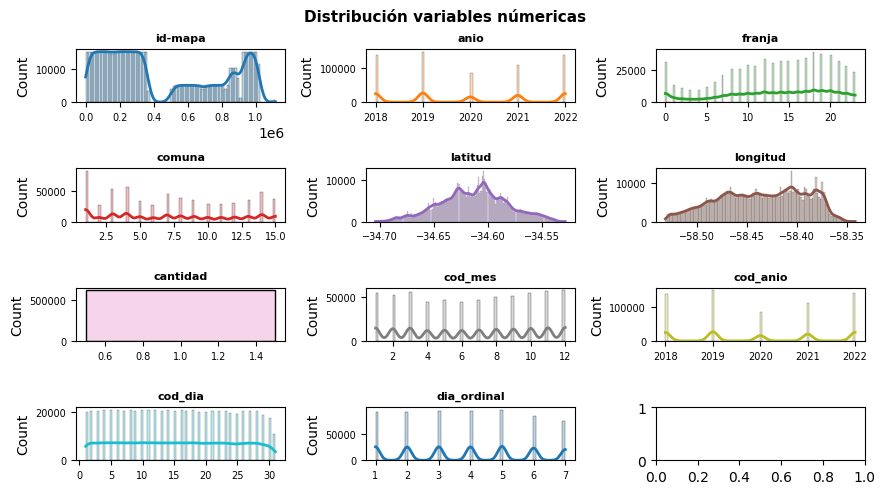

In [ ]:
graficosCuantitativos(columns_numerical[0:13])

### Distribución gráfica de variables categóricas.

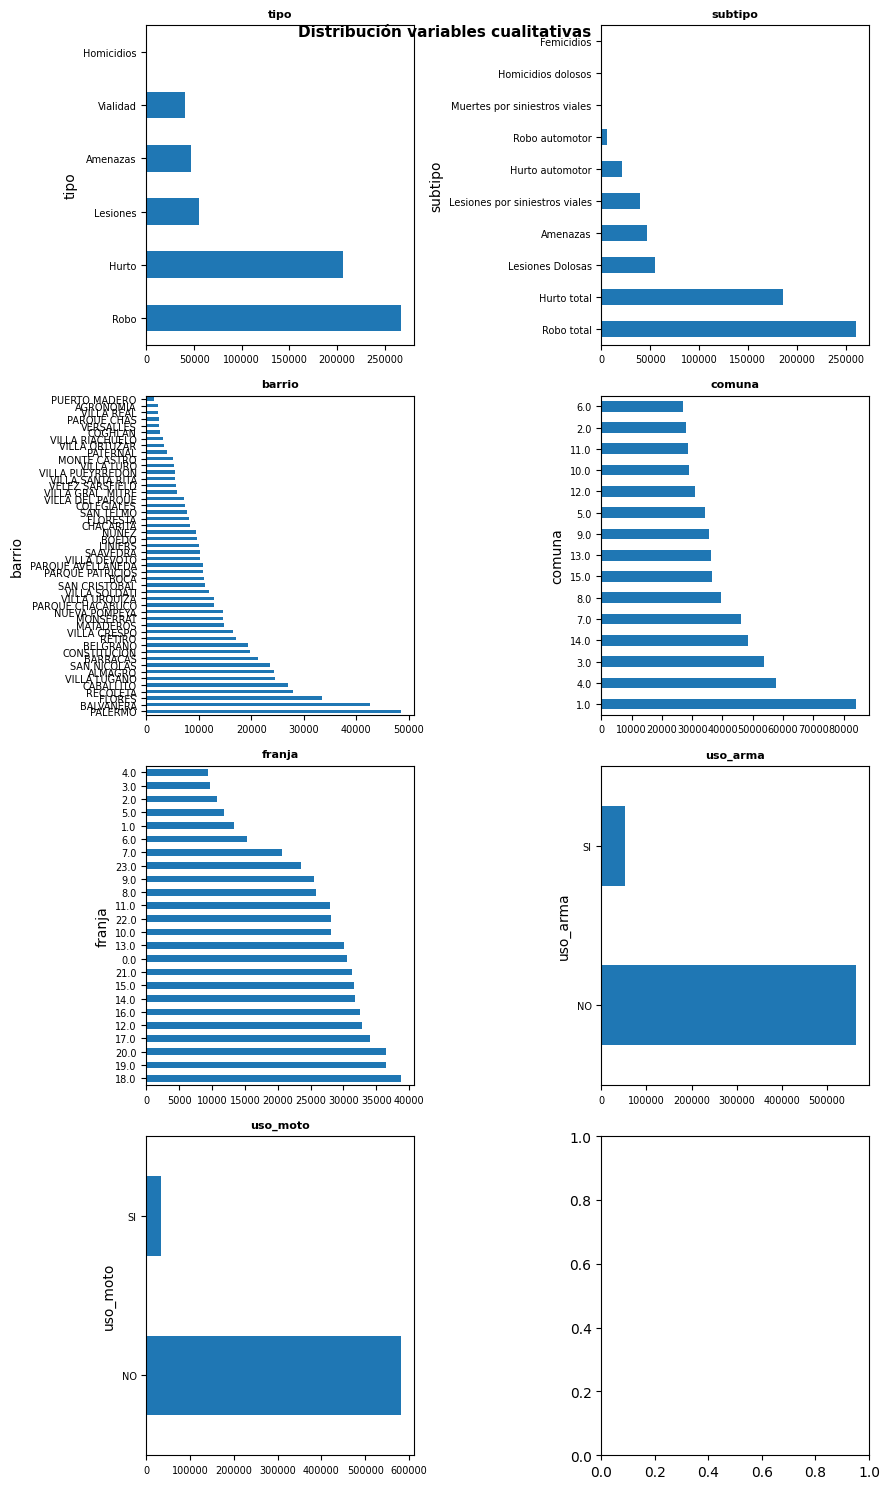

In [ ]:
# Función para crear gráficos de distribución para variables cualitativas
def graficosCualitativos(num_rows, num_cols, columns_data, df):
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(9, 15))
    axes = axes.flat
    for i, column in enumerate(columns_data):
        df_final[column].value_counts().plot.barh(ax=axes[i])
        axes[i].set_title(column, fontweight="bold", fontsize=8)
        axes[i].tick_params(labelsize=7)
        axes[i].set_xlabel('')

    fig.tight_layout()
    fig.suptitle('Distribución variables cualitativas', fontweight="bold", fontsize=11)
    plt.show()

# Seleccionar las columnas que quiero representar
columns_data = ['tipo', 'subtipo', 'barrio', 'comuna', 'franja', 'uso_arma', 'uso_moto']

# Llamar a la función para crear los gráficos
graficosCualitativos(num_rows=4, num_cols=2, columns_data=columns_data, df = df_final)

### Evolución de la cantidad de delitos a través del tiempo.

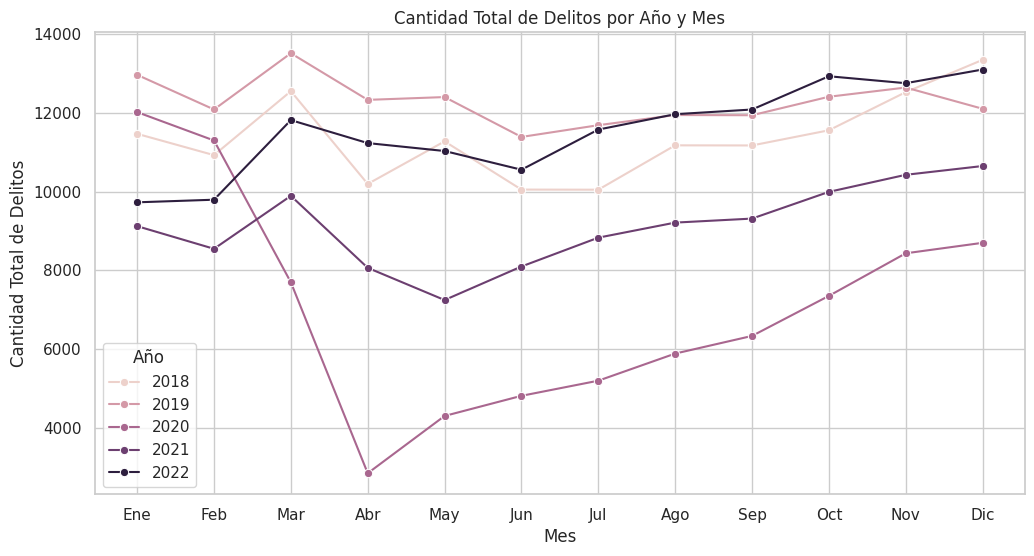

In [ ]:
# Agrupar por año y mes, y sumar la cantidad de robos
datos_agrupados = df_final.groupby(['cod_anio', 'cod_mes'])['cantidad'].sum().reset_index()

# Configurar el estilo de la gráfica
sns.set(style="whitegrid")

# Configurar la figura y los ejes
plt.figure(figsize=(12, 6))

# Graficar los datos agrupados
sns.lineplot(data=datos_agrupados, x='cod_mes', y='cantidad', hue='cod_anio', marker='o')

# Configurar etiquetas y leyenda
plt.title('Cantidad Total de Delitos por Año y Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad Total de Delitos')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend(title='Año')

# Mostrar la gráfica
plt.show()

### Evolución de delitos en comunas por año.

<AxesSubplot: xlabel='count', ylabel='comuna'>

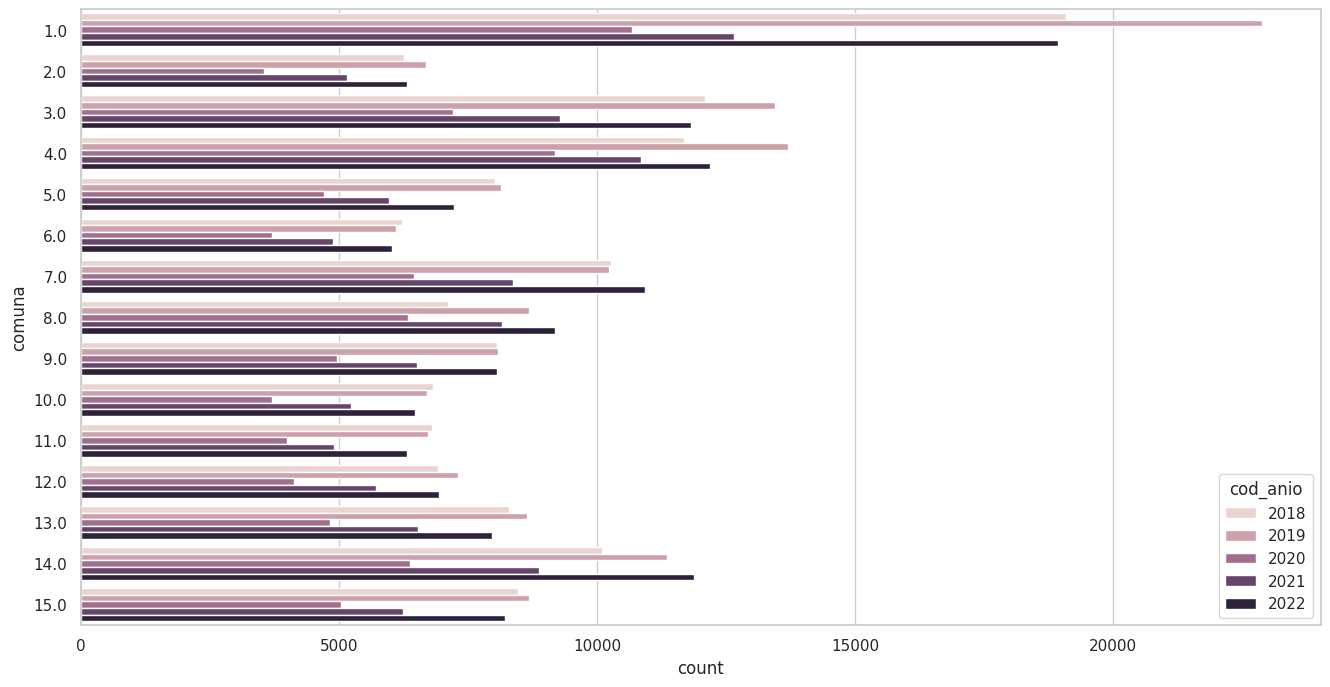

In [ ]:
#Gráfico que muestra los delitos por año por comuna

plt.rcParams['figure.figsize'] = (16,8)
sns.countplot(y=df_final['comuna'], hue=df_final['cod_anio'])

### Composición de delitos según su tipo.

/tmp/ipykernel_63/1263525179.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cantidad', y='tipo', data=datos_por_tipo, palette='viridis')


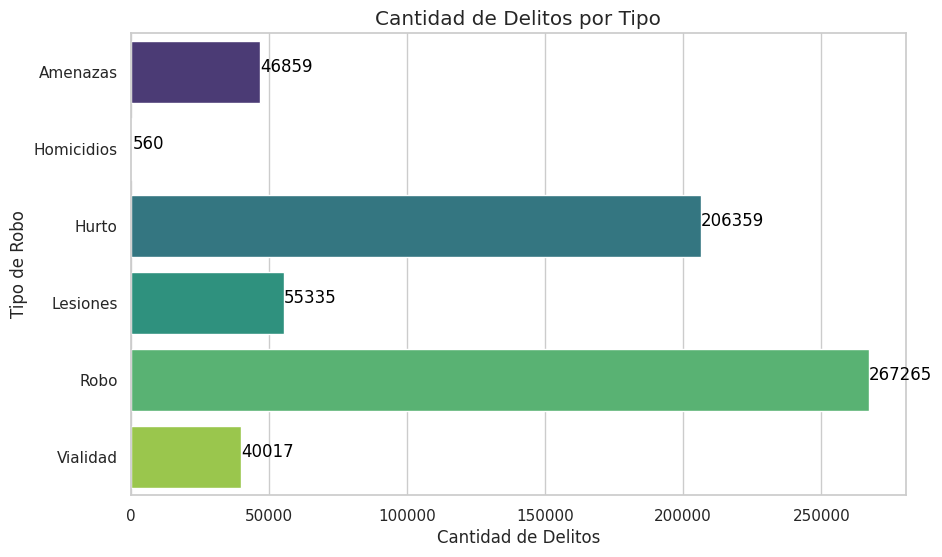

In [ ]:
# Agrupar por tipo y sumar la cantidad de delitos
datos_por_tipo = df_final.groupby('tipo')['cantidad'].sum().reset_index()

# Configurar el estilo de la gráfica
sns.set(style="whitegrid")

# Configurar la figura y los ejes
plt.figure(figsize=(10, 6))

# Graficar los datos
sns.barplot(x='cantidad', y='tipo', data=datos_por_tipo, palette='viridis')

# Mostrar las etiquetas (marcas) dentro de las barras
for index, row in datos_por_tipo.iterrows():
    plt.text(row['cantidad'], index, row['cantidad'], color='black', ha="left")

# Configurar el estilo de la gráfica
sns.set(style="whitegrid", font_scale=1.2)  # Ajusta el tamaño general de la fuente

# Configurar etiquetas y título
plt.title('Cantidad de Delitos por Tipo')
plt.xlabel('Cantidad de Delitos')
plt.ylabel('Tipo de Robo')

# Mostrar la gráfica
plt.show()


### Composición de delitos según su subtipo.

/tmp/ipykernel_63/2162403720.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cantidad', y='subtipo', data=datos_por_subtipo, palette='viridis')


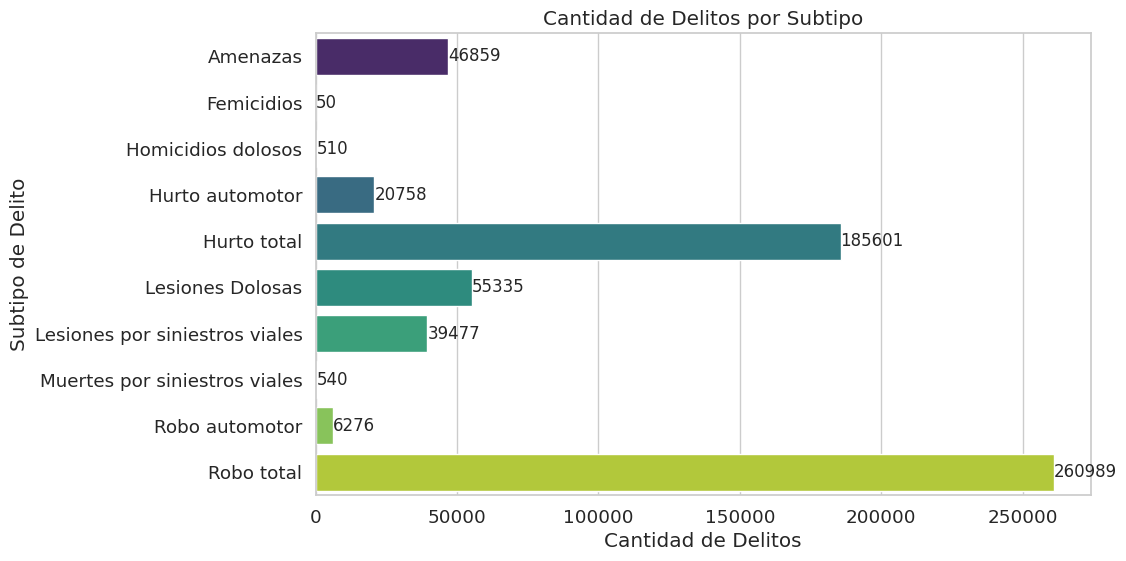

In [ ]:
# Agrupar por subtipo y sumar la cantidad de robos
datos_por_subtipo = df_final.groupby('subtipo')['cantidad'].sum().reset_index()

# Configurar el estilo de la gráfica
sns.set(style="whitegrid", font_scale=1.2)

# Configurar la figura y los ejes
plt.figure(figsize=(10, 6))

# Graficar los datos
sns.barplot(x='cantidad', y='subtipo', data=datos_por_subtipo, palette='viridis')

# Mostrar las etiquetas (marcas) dentro de las barras
for index, row in datos_por_subtipo.iterrows():
    plt.annotate(f"{row['cantidad']}", (row['cantidad'], index), fontsize=12, va='center')

# Configurar etiquetas y título
plt.title('Cantidad de Delitos por Subtipo')
plt.xlabel('Cantidad de Delitos')
plt.ylabel('Subtipo de Delito')

# Mostrar la gráfica
plt.show()


### Delitos con uso de arma.

/tmp/ipykernel_63/2994452014.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='uso_arma', y='cantidad', data=datos_por_arma, palette='viridis')


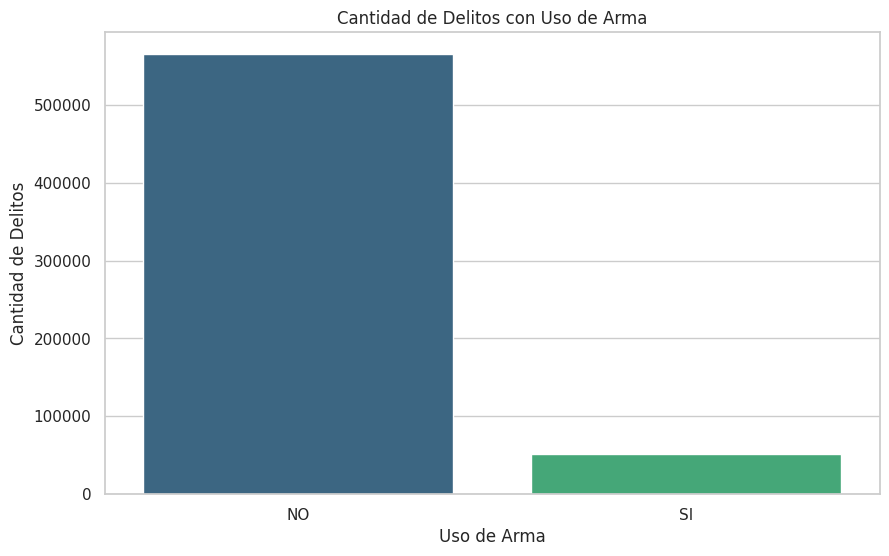

In [ ]:
# Agrupar por 'uso_arma' y sumar la cantidad de robos
datos_por_arma = df_final.groupby('uso_arma')['cantidad'].sum().reset_index()

# Configurar el estilo de la gráfica
sns.set(style="whitegrid")

# Configurar la figura y los ejes
plt.figure(figsize=(10, 6))

# Graficar los datos
sns.barplot(x='uso_arma', y='cantidad', data=datos_por_arma, palette='viridis')

# Configurar etiquetas y título
plt.title('Cantidad de Delitos con Uso de Arma')
plt.xlabel('Uso de Arma')
plt.ylabel('Cantidad de Delitos')

# Mostrar la gráfica
plt.show()

### Delitos con uso de motocicleta.

/tmp/ipykernel_63/545403597.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='uso_moto', y='cantidad', data=datos_por_moto, palette='viridis')


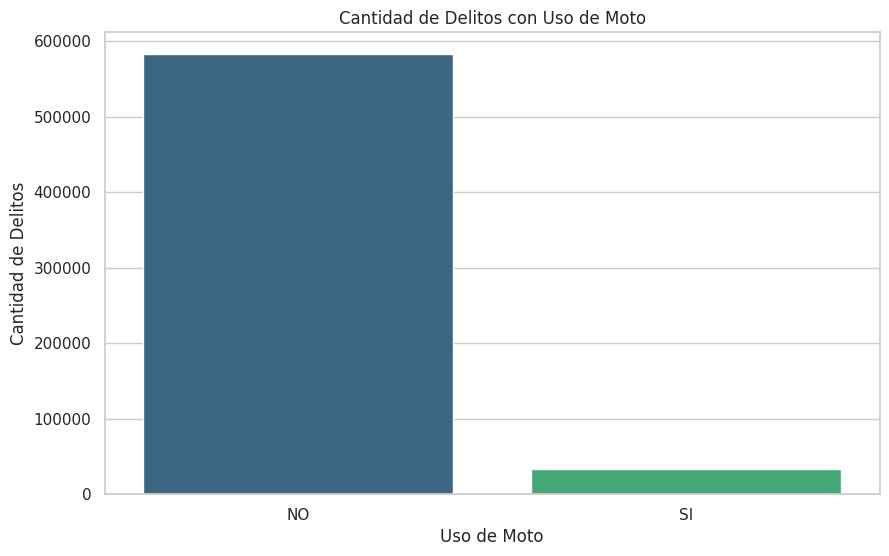

In [ ]:
# Agrupar por 'uso_moto' y sumar la cantidad de robos
datos_por_moto = df_final.groupby('uso_moto')['cantidad'].sum().reset_index() 

# Configurar el estilo de la gráfica
sns.set(style="whitegrid")

# Configurar la figura y los ejes
plt.figure(figsize=(10, 6))

# Graficar los datos
sns.barplot(x='uso_moto', y='cantidad', data=datos_por_moto, palette='viridis')

# Configurar etiquetas y título
plt.title('Cantidad de Delitos con Uso de Moto')
plt.xlabel('Uso de Moto')
plt.ylabel('Cantidad de Delitos')

# Mostrar la gráfica
plt.show()


### Delitos agrupados por Franja Horaria.

/tmp/ipykernel_63/2866554340.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='franja', y='cantidad', data=datos_por_franja, palette='viridis')


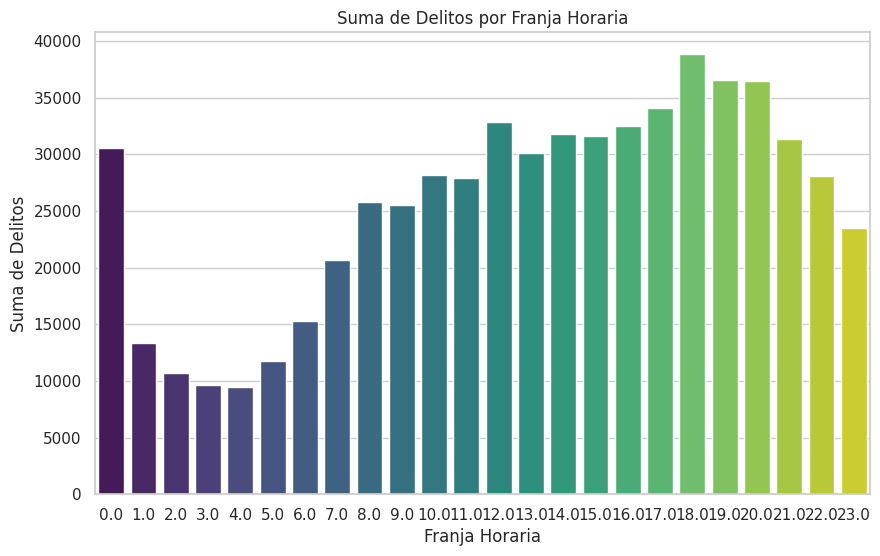

In [ ]:
# Agrupar por 'franja' y sumar la cantidad de robos
datos_por_franja = df_final.groupby('franja')['cantidad'].sum().reset_index() 

# Configurar el estilo de la gráfica
sns.set(style="whitegrid")

# Configurar la figura y los ejes
plt.figure(figsize=(10, 6))

# Graficar los datos
sns.barplot(x='franja', y='cantidad', data=datos_por_franja, palette='viridis')

# Configurar etiquetas y título
plt.title('Suma de Delitos por Franja Horaria')
plt.xlabel('Franja Horaria')
plt.ylabel('Suma de Delitos')

# Mostrar la gráfica
plt.show()

### Barrios con mayor cantidad de Delitos.

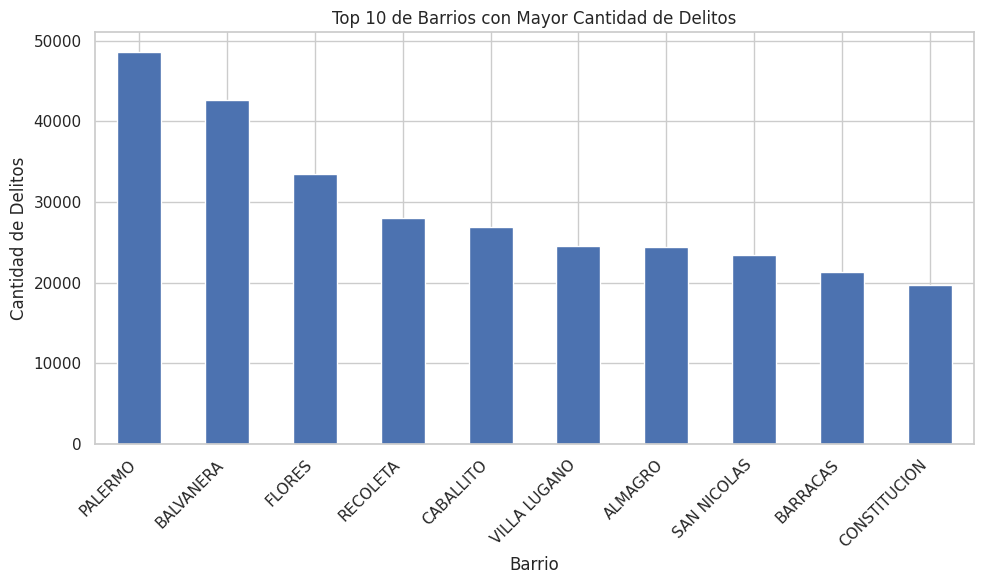

In [ ]:
# Contar la cantidad de robos por barrio
robos_por_barrio = df_final['barrio'].value_counts()

# Seleccionar los 10 barrios con la mayor cantidad de robos
top_10_robos_por_barrio = robos_por_barrio.head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
top_10_robos_por_barrio.plot(kind='bar')
plt.title('Top 10 de Barrios con Mayor Cantidad de Delitos')
plt.xlabel('Barrio')
plt.ylabel('Cantidad de Delitos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Tipo de Delitos por Barrio.

In [ ]:
#Generar una tabla que indique el tipo de delito por barrio y la cantidad
pd.crosstab(index=df_final.barrio, columns=df_final.tipo, margins=True)

tipo,Amenazas,Homicidios,Hurto,Lesiones,Robo,Vialidad,All
barrio,,,,,,,
AGRONOMIA,108,0,746,134,855,283,2126
ALMAGRO,1477,7,7724,1626,12253,1317,24404
BALVANERA,2417,38,15299,3664,18821,2360,42599
BARRACAS,2413,74,4813,2813,10186,1014,21313
BELGRANO,1032,12,7489,1145,8386,1380,19444
BOCA,1528,12,2344,1947,4656,407,10894
BOEDO,738,5,3384,732,4128,703,9690
CABALLITO,1849,11,9356,1959,11986,1787,26948
CHACARITA,567,11,2403,769,3787,734,8271


### Cantidad de Delitos por Día de la Semana.

/tmp/ipykernel_63/3993236310.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dia', y='cantidad', data=delitos_por_dia, palette='viridis')


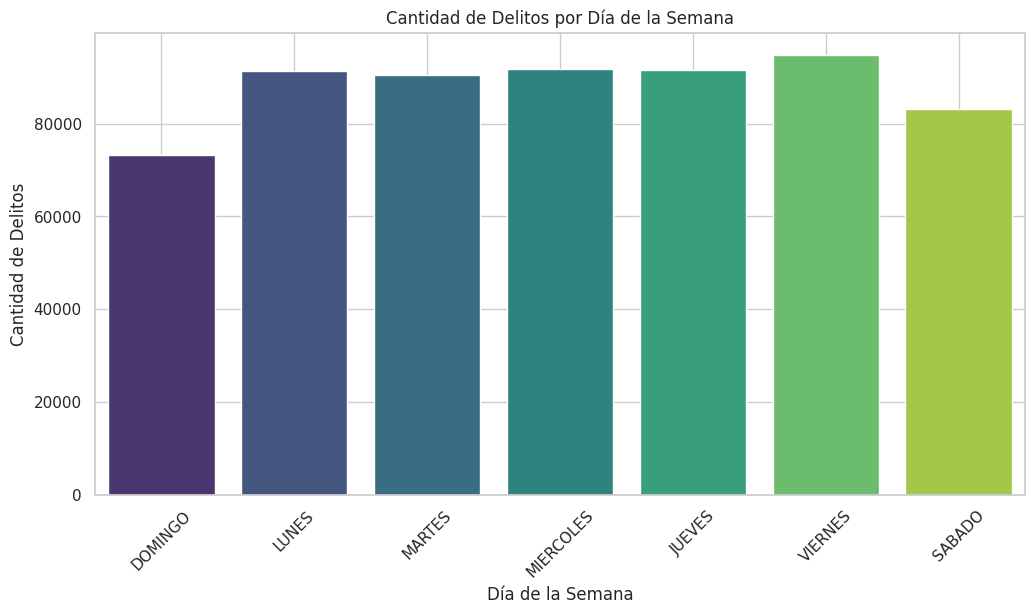

In [ ]:
# Agrupar por día de la semana y contar la cantidad de delitos
delitos_por_dia = df_final.groupby('dia').size().reset_index(name='cantidad')

# Asegurar que los días de la semana estén en el orden correcto
dias_orden = ['DOMINGO', 'LUNES', 'MARTES', 'MIERCOLES', 'JUEVES', 'VIERNES', 'SABADO']
delitos_por_dia['dia'] = pd.Categorical(delitos_por_dia['dia'], categories=dias_orden, ordered=True)
delitos_por_dia = delitos_por_dia.sort_values('dia')

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x='dia', y='cantidad', data=delitos_por_dia, palette='viridis')
plt.title('Cantidad de Delitos por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Delitos')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Cantidad de Delitos por Mes.

/tmp/ipykernel_63/2636329700.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mes', y='cantidad', data=delitos_por_mes, palette='viridis')


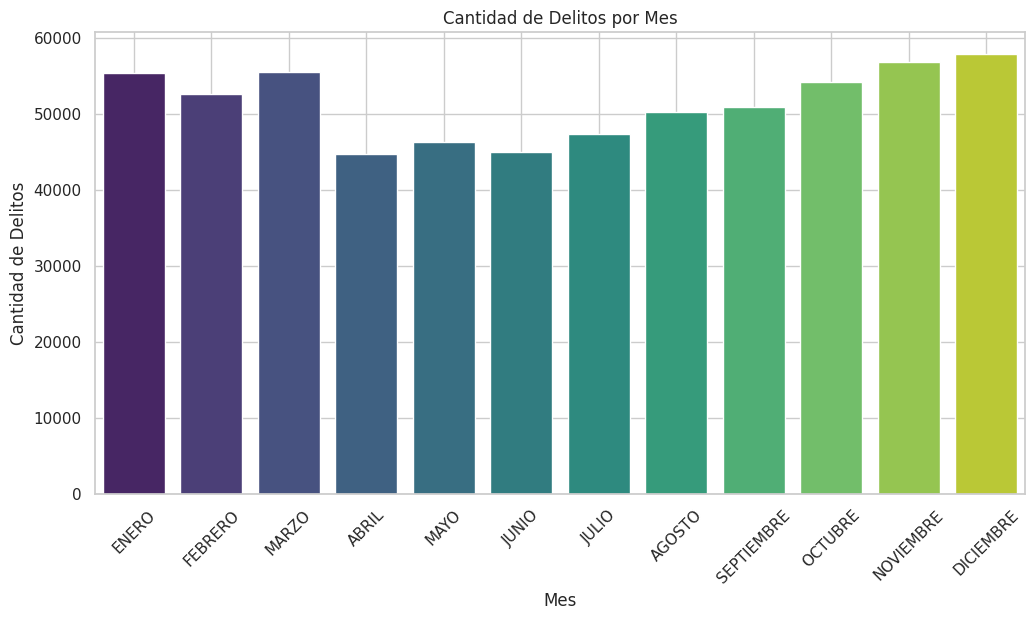

In [ ]:
# Agrupar por día de la semana y contar la cantidad de delitos
delitos_por_mes = df_final.groupby('mes').size().reset_index(name='cantidad')

# Asegurar que los meses estén en el orden correcto
mes_orden = ['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO', 'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE']
delitos_por_mes['mes'] = pd.Categorical(delitos_por_mes['mes'], categories=mes_orden, ordered=True)
delitos_por_mes = delitos_por_mes.sort_values('mes')

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x='mes', y='cantidad', data=delitos_por_mes, palette='viridis')
plt.title('Cantidad de Delitos por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Delitos')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Correlación Variables Selecciónadas.

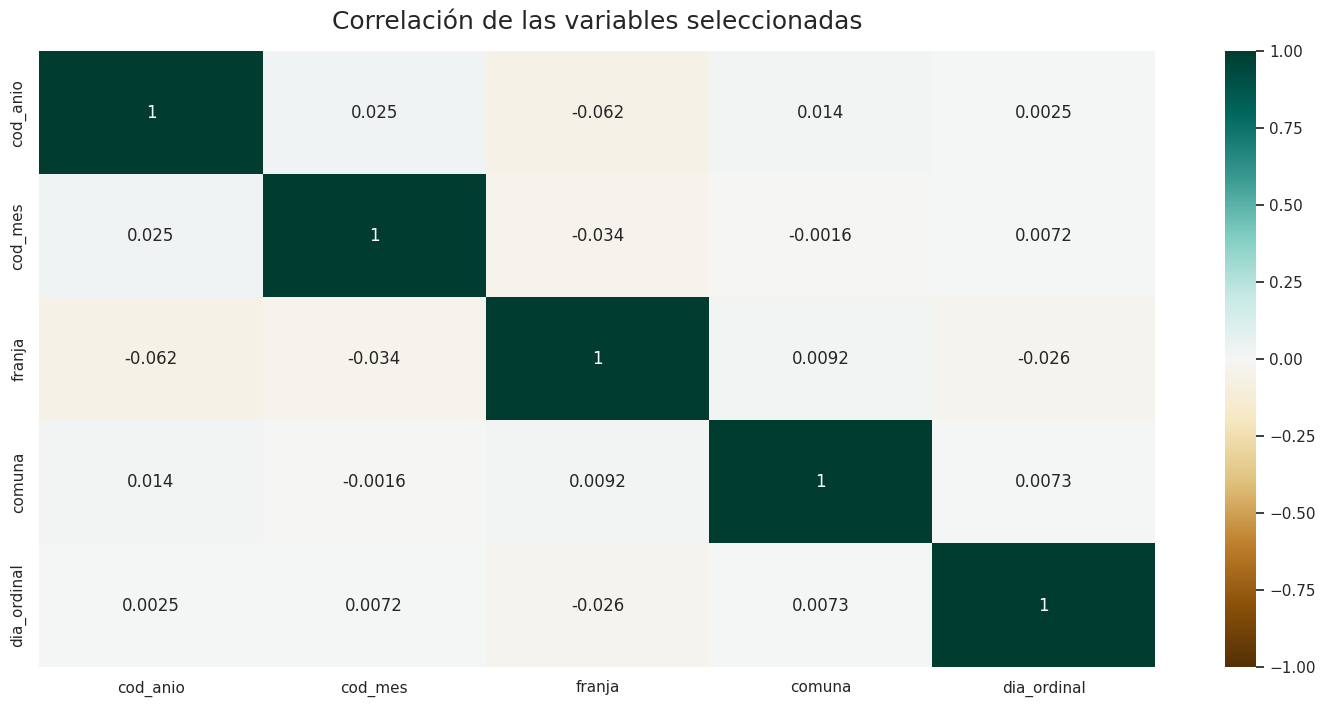

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Selecciona las columnas que deseas incluir
columnas_seleccionadas = ['cod_anio', 'cod_mes', 'franja', 'comuna', 'dia_ordinal']   

# Filtra el DataFrame para incluir solo las columnas seleccionadas
df_filtrado = df_final[columnas_seleccionadas]

# Calcula la correlación de las columnas seleccionadas
correlacion = df_filtrado.corr()

# Configura la figura del heatmap
plt.figure(figsize=(18, 8))

# Crea el heatmap
heatmap = sns.heatmap(correlacion, vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Ajusta el título del heatmap
heatmap.set_title('Correlación de las variables seleccionadas', fontdict={'fontsize':18}, pad=16)

# Muestra el gráfico
plt.show()


### Delitos por franja y barrio.

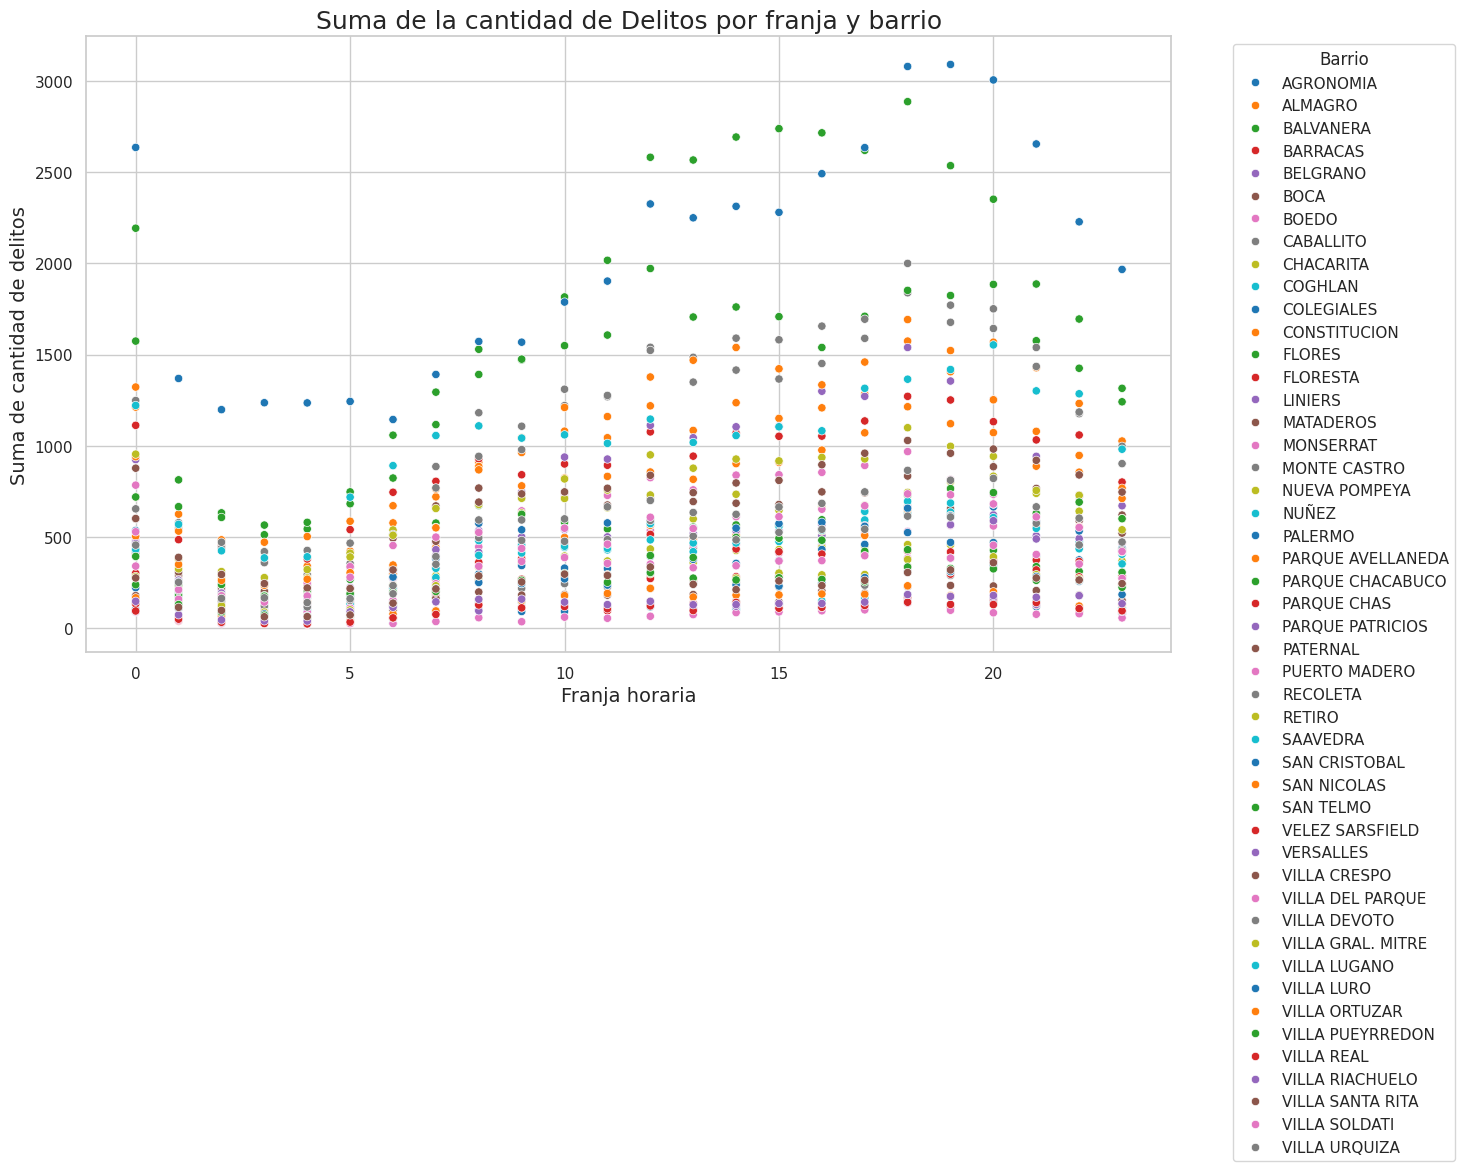

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Agrupa los datos por barrio y franja y suma la cantidad de robos en cada franja
df_agrupado = df_final.groupby(['barrio', 'franja'])['cantidad'].sum().reset_index()

# Configura la figura del gráfico de dispersión
plt.figure(figsize=(14, 8))

# Crea el gráfico de dispersión
sns.scatterplot(data=df_agrupado, x='franja', y='cantidad', hue='barrio', palette='tab10')

# Ajusta el título y etiquetas del gráfico
plt.title('Suma de la cantidad de Delitos por franja y barrio', fontsize=18)
plt.xlabel('Franja horaria', fontsize=14)
plt.ylabel('Suma de cantidad de delitos', fontsize=14)

# Ajusta la leyenda
plt.legend(title='Barrio', bbox_to_anchor=(1.05, 1), loc='upper left')

# Muestra el gráfico
plt.show()


### Palermo, Caballito y Balvanera.

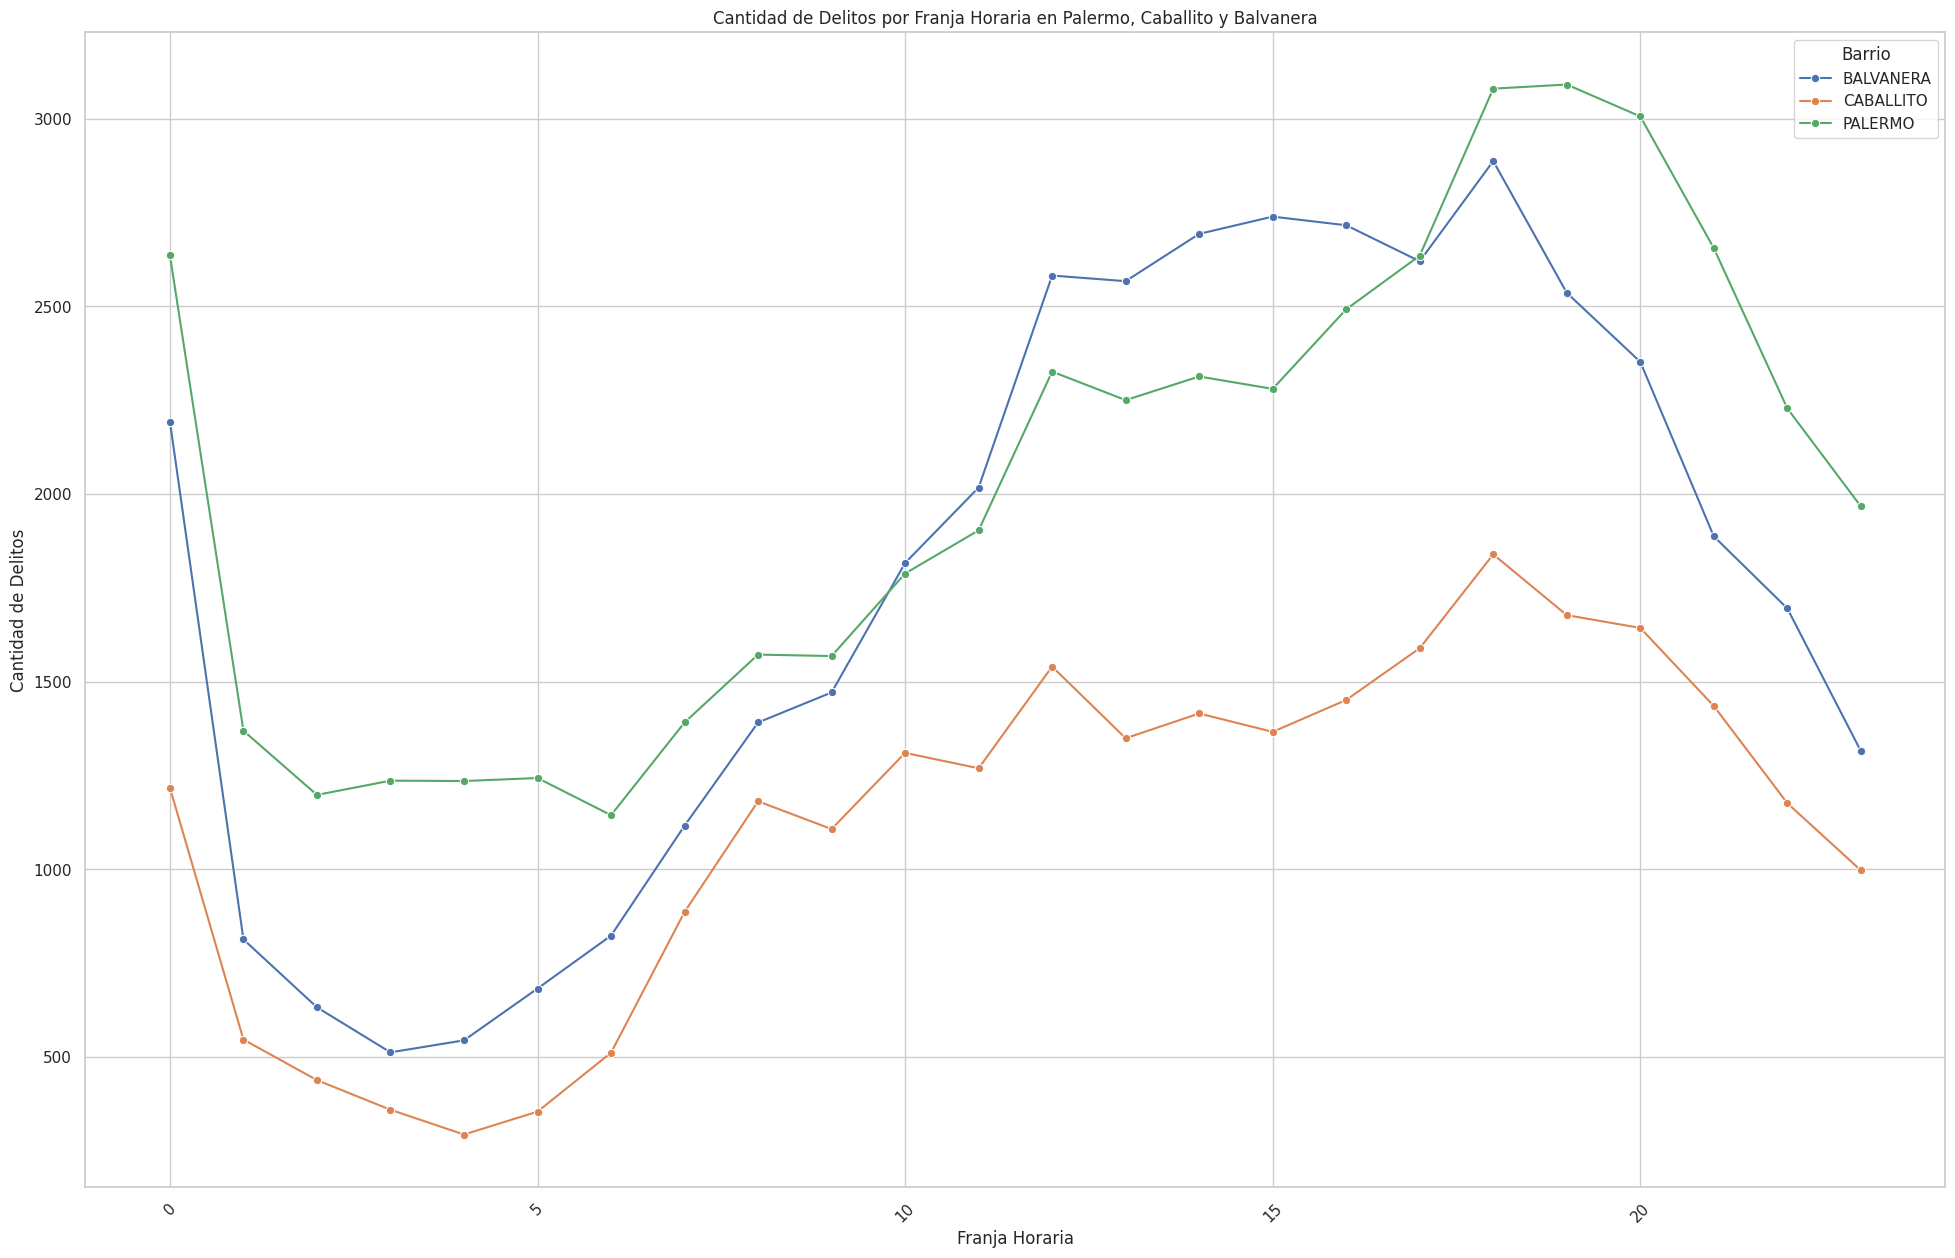

In [ ]:
# Filtrar los datos para los barrios de interés
barrios_interes = ['PALERMO', 'CABALLITO', 'BALVANERA']
df_filtrado = df_final[df_final['barrio'].isin(barrios_interes)]

# Agrupar por franja horaria y barrio
delitos_por_franja = df_filtrado.groupby(['barrio', 'franja']).size().reset_index(name='cantidad')

# Crear el gráfico
plt.figure(figsize=(24, 15))
sns.lineplot(data=delitos_por_franja, x='franja', y='cantidad', hue='barrio', marker='o')
plt.title('Cantidad de Delitos por Franja Horaria en Palermo, Caballito y Balvanera')
plt.xlabel('Franja Horaria')
plt.ylabel('Cantidad de Delitos')
plt.legend(title='Barrio')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Conclusiones: Podemos observar que hay una clara diferencia entre barrios y horarios en los cuales se cometen los delitos. Se puede identificar que en Palermo Caballito y Balvanera se comete la mayor cantidad y los horarios son entre las 18 y las 20. No hay correlación entre variables. Se puede entonces elegir barrio, franja horaria y tipo de delito para crear un modelo predictivo de clasificación.

## Selección de modelos, entrenamiento y evaluación

In [ ]:
# Cargar el dataset
file_path = '/work/df_final.csv'
df = pd.read_csv(file_path)

### Random Forest

In [ ]:
# Cargar los datos
delitos_df  = df

# Seleccionar características y objetivo
X = delitos_df[['barrio', 'franja']]
y = delitos_df['tipo']

# Codificar variables categóricas
label_encoder_barrio = LabelEncoder()
label_encoder_franja = LabelEncoder()
label_encoder_tipo = LabelEncoder()

X['barrio'] = label_encoder_barrio.fit_transform(X['barrio'])
X['franja'] = label_encoder_franja.fit_transform(X['franja'])
y = label_encoder_tipo.fit_transform(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Realizar predicciones
y_pred = clf.predict(X_test)

# Evaluar el modelo
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder_tipo.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

/tmp/ipykernel_63/416261130.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['barrio'] = label_encoder_barrio.fit_transform(X['barrio'])
/tmp/ipykernel_63/416261130.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['franja'] = label_encoder_franja.fit_transform(X['franja'])
Classification Report:
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predict

Código para hacer pruebas del modelo ingresando datos manualmente

In [ ]:
# Función para predecir el tipo de delito basado en barrio y franja
def predecir_delito(barrio, franja):
    barrio_encoded = label_encoder_barrio.transform([barrio])[0]
    franja_encoded = label_encoder_franja.transform([franja])[0]
    prediction_encoded = clf.predict([[barrio_encoded, franja_encoded]])[0]
    prediction = label_encoder_tipo.inverse_transform([prediction_encoded])[0]
    return prediction

# Ejemplo de uso de la función de predicción
barrio = 'ALMAGRO'
franja = 16
tipo_predicho = predecir_delito(barrio, franja)
print(f'El tipo de delito predicho para el barrio {barrio} en la franja {franja} es: {tipo_predicho}')

El tipo de delito predicho para el barrio ALMAGRO en la franja 16 es: Robo
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


#### Conclusiones Random Forest.

El modelo parece tener dificultades para predecir con precisión las clases minoritarias como "Amenazas", "Homicidios", "Lesiones" y "Vialidad". Esto se refleja en las métricas de precision, recall y f1-score para estas clases, que son muy bajas o incluso nulas. Específicamente:

Precision: Indica la proporción de predicciones positivas que fueron realmente correctas. Para clases como "Amenazas", "Homicidios", "Lesiones" y "Vialidad", la precisión es muy baja o incluso cero, lo que significa que cuando el modelo predice estas clases, es probable que esté equivocado.

Recall: Mide la proporción de casos positivos reales que fueron identificados correctamente por el modelo. Nuevamente, para las clases minoritarias mencionadas, el recall es muy bajo, lo que indica que el modelo tiene dificultades para identificar correctamente estos casos.

F1-score: Es una media armónica entre precision y recall. Un f1-score bajo en estas clases indica un rendimiento deficiente tanto en la precisión como en la capacidad de recuperar correctamente los casos positivos.

Confusion Matrix: También podemos observar en la matriz de confusión que hay problemas significativos de clasificación para las clases menos frecuentes, donde el modelo tiende a confundir estas clases con las clases más predominantes como "Robo" y "Hurto".

Conclusiones generales:

El modelo tiene un rendimiento aceptable para las clases más frecuentes como "Robo" y "Hurto", con precisiones y recalls relativamente altos.
Sin embargo, para las clases menos comunes como "Amenazas", "Homicidios", "Lesiones" y "Vialidad", el modelo no está funcionando bien y necesita mejoras significativas.
Podría haber varias razones para esto, como el desbalance de clases en los datos, la falta de características discriminativas para estas clases o la necesidad de ajustar los hiperparámetros del modelo.

#### Recomendaciones.

Recomendaciones para mejorar el modelo:

- Considerar técnicas de manejo de desbalance de clases, como el muestreo estratificado o la generación de datos sintéticos.

-  Explorar la posibilidad de incluir más características relevantes que puedan ayudar al modelo a distinguir mejor entre las diferentes clases de delitos.-

- Experimentar con ajustes en los hiperparámetros del modelo Random Forest, como el número de árboles (n_estimators) o la profundidad máxima del árbol (max_depth).

- Evaluar otros modelos de clasificación que podrían ser más adecuados para datos desbalanceados o que puedan capturar mejor las relaciones no lineales entre las características y el tipo de delito.

### Regresión Logística.

Se intenta determinar la probabilidad de que el delito cometido en un barrio y franja determinada sea 'Robo'

In [ ]:
# Cargar el dataset
file_path = '/work/df_final.csv'
df = pd.read_csv(file_path)

# Seleccionar las columnas relevantes
df_relevant = df[['franja', 'barrio', 'tipo']]

# Convertir la columna 'barrio' en variables dummy
df_encoded = pd.get_dummies(df_relevant, columns=['barrio'])

# Seleccionar el tipo de delito a predecir (por ejemplo, "Robo")
df_encoded['target'] = (df_encoded['tipo'] == 'Robo').astype(int)

# Eliminar la columna 'tipo' ya que ahora tenemos nuestra columna objetivo 'target'
df_encoded = df_encoded.drop(columns=['tipo'])


In [ ]:
# Dividir en conjuntos de entrenamiento y prueba
X = df_encoded.drop(columns=['target'])
y = df_encoded['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Hacer predicciones
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluar el modelo
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.98      0.72    104673
           1       0.54      0.04      0.07     80246

    accuracy                           0.57    184919
   macro avg       0.56      0.51      0.40    184919
weighted avg       0.56      0.57      0.44    184919

Confusion Matrix:
[[102103   2570]
 [ 77197   3049]]


Realizar una predicción ingresando manualmente el barrio y la franja para ver si hay posibilidad de robo.

In [ ]:
# Función para predecir si el tipo de delito es "Robo" basado en franja y barrio
def predecir_robo(franja, barrio):
    # Crear un DataFrame para el nuevo dato con todas las posibles columnas dummies
    new_data = pd.DataFrame(columns=X.columns)
    new_data.loc[0] = 0  # Inicializar todas las columnas a 0

    # Establecer los valores para franja y barrio correspondientes
    new_data['franja'] = franja
    if f'barrio_{barrio}' in new_data.columns:
        new_data[f'barrio_{barrio}'] = 1

    # Realizar la predicción
    prediction = model.predict(new_data)[0]
    prediction_proba = model.predict_proba(new_data)[0][1]
    
    return prediction, prediction_proba

# Ejemplo de uso de la función de predicción
franja = 15
barrio = 'ALMAGRO'
prediccion, probabilidad = predecir_robo(franja, barrio)
resultado = "Robo" if prediccion == 1 else "No Robo"
print(f'El tipo de delito predicho para el barrio {barrio} en la franja {franja} es: {resultado} con una probabilidad de {probabilidad:.2f}')

El tipo de delito predicho para el barrio ALMAGRO en la franja 15 es: No Robo con una probabilidad de 0.50


#### Conclusiones Regresión Logística.

### Análisis del Classification Report:
1. **Precision y Recall:**
   - **Precision:** Para la clase 1 (delitos de tipo 'Robo'), la precisión es 0.54. Esto significa que cuando el modelo predice que un delito es un 'Robo', el 54% de las veces realmente es un robo.
   - **Recall:** El recall para la clase 1 es bastante bajo, solo 0.04. Esto indica que de todos los casos de 'Robo' reales en los datos de prueba, el modelo solo logra identificar el 4%.
2. **F1-score:**
   - El F1-score para la clase 1 es 0.07, lo cual es bajo. Esto sugiere que el modelo no está logrando un buen equilibrio entre precision y recall para la clase minoritaria de 'Robo'.
### Análisis de la Confusion Matrix:
- La matriz de confusión muestra que el modelo predijo correctamente 3,049 casos de 'Robo' (verdaderos positivos) y 77,197 casos de 'No Robo' incorrectamente como 'Robo' (falsos positivos). Además, dejó sin detectar 77,197 casos de 'Robo' (falsos negativos) y clasificó correctamente 102,103 casos como 'No Robo' (verdaderos negativos).
En resumen, aunque el modelo tiene una precisión aceptable para predecir 'No Robo', necesita mejoras significativas para detectar correctamente los casos de 'Robo'. Ajustar el manejo de desbalance, explorar más características relevantes y probar otros modelos pueden ser pasos clave para mejorar la precisión general del modelo, especialmente en la clase minoritaria de 'Robo'.

#### Recomendaciones.

1. **Desbalance de clases:** La baja recall para la clase 'Robo' indica un problema típico de desbalance de clases, donde hay muchas más instancias de 'No Robo' que de 'Robo'. Esto puede llevar a que el modelo tenga dificultades para aprender patrones que distingan correctamente los casos de 'Robo'.

2. **Mejora del modelo:**
   **Manejo de desbalance:** Considerar técnicas como el muestreo estratificado o el uso de pesos de clase en el modelo para tratar el desbalance y mejorar el rendimiento en la clase minoritaria.

4. **Ajuste de hiperparámetros:** Experimentar con diferentes valores de hiperparámetros para la regresión logística, como la regularización (C), el número máximo de iteraciones, etc., para ver si mejoran los resultados.


### Gradient Boosting (XGBoost)

In [ ]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 9.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Cargar los datos
file_path = '/work/df_final.csv'
delitos_df = pd.read_csv(file_path)

# Codificar variables categóricas
label_encoder_barrio = LabelEncoder()
label_encoder_franja = LabelEncoder()
label_encoder_tipo = LabelEncoder()

delitos_df['barrio_encoded'] = label_encoder_barrio.fit_transform(delitos_df['barrio'])
delitos_df['franja_encoded'] = label_encoder_franja.fit_transform(delitos_df['franja'])
delitos_df['tipo_encoded'] = label_encoder_tipo.fit_transform(delitos_df['tipo'])

# Seleccionar características y objetivo
X = delitos_df[['barrio_encoded', 'franja_encoded']]
y = delitos_df['tipo_encoded']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Definir el modelo XGBoost
xgb_model = XGBClassifier(random_state=42)

# Entrenar el modelo
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Hacer predicciones en el conjunto de prueba
y_pred = xgb_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder_tipo.classes_))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.45127866795732186
Classification Report:
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

Realizar una predicción ingresando los datos manualmente

In [ ]:
# Crear un nuevo dato (ejemplo)
nuevo_dato = pd.DataFrame({
    'barrio': ['CABALLITO'],  # Nombre del barrio
    'franja': [10]  # Franja horaria
})

# Codificar el nuevo dato utilizando los mismos label encoders
nuevo_dato['barrio_encoded'] = label_encoder_barrio.transform(nuevo_dato['barrio'])
nuevo_dato['franja_encoded'] = label_encoder_franja.transform(nuevo_dato['franja'])

# Seleccionar las características
X_nuevo = nuevo_dato[['barrio_encoded', 'franja_encoded']]

# Hacer la predicción
prediccion = xgb_model.predict(X_nuevo)

# Decodificar la predicción
prediccion_decodificada = label_encoder_tipo.inverse_transform(prediccion)
print(f"Predicción para el nuevo dato: {prediccion_decodificada[0]}")


Predicción para el nuevo dato: Hurto


#### Conclusiones Gradient Boosting (XGBoost)

**F1-score:**
   - El F1-score para la clase 'Robo' es 0.58, lo cual es razonable. Esto sugiere que el modelo está logrando un equilibrio aceptable entre precision y recall para la clase 'Robo'.




### Análisis de la Confusion Matrix:




- La matriz de confusión muestra que el modelo predijo correctamente 63,352 casos de 'Robo' (verdaderos positivos) y 16,894 casos de 'No Robo' como 'Robo' (falsos positivos). Además, no logró detectar correctamente 16,894 casos de 'Robo' (falsos negativos) y clasificó correctamente 102,103 casos como 'No Robo' (verdaderos negativos).




### Comentarios generales:




- El modelo XGBoost muestra una mejora en la precisión y recall para la clase 'Robo' en comparación con modelos anteriores como la regresión logística.
- Sin embargo, aún existen desafíos significativos en la predicción de otras clases minoritarias como 'Amenazas', 'Homicidios', 'Lesiones' y 'Vialidad', donde las métricas son muy bajas o incluso nulas.






#### Recomendaciones

**Manejo del desbalance de clases:** Considerar técnicas como el muestreo estratificado, el ajuste de pesos de clase en el modelo o el uso de técnicas de remuestreo como SMOTE para mejorar la predicción en las clases minoritarias.
**Ajuste de hiperparámetros:** Experimentar con diferentes configuraciones de hiperparámetros para XGBoost, como la profundidad máxima del árbol (`max_depth`), el número de estimadores (`n_estimators`) y la tasa de aprendizaje (`learning_rate`) para optimizar el rendimiento del modelo.

En resumen, el modelo XGBoost muestra mejoras significativas en la predicción de la clase 'Robo' en comparación con modelos anteriores, pero todavía hay áreas donde se puede trabajar para mejorar la precisión y recall en las clases minoritarias de delitos.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cb2c56ba-fda3-4142-bfc3-4286b760295e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>